## Question 1: Who is my competition?

Who is my competition?: 
   * Top 10 Studios producing the most films. 
   * Top 10 Studios making the highest gross income in average.  

## Data Modeling

Here, I will use .value_counts() and .groupby() to obtain the Studio count and the mean total gross for each studio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%store -r studios_df

In [2]:
studios_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
 5   total_gross     3382 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 185.0+ KB


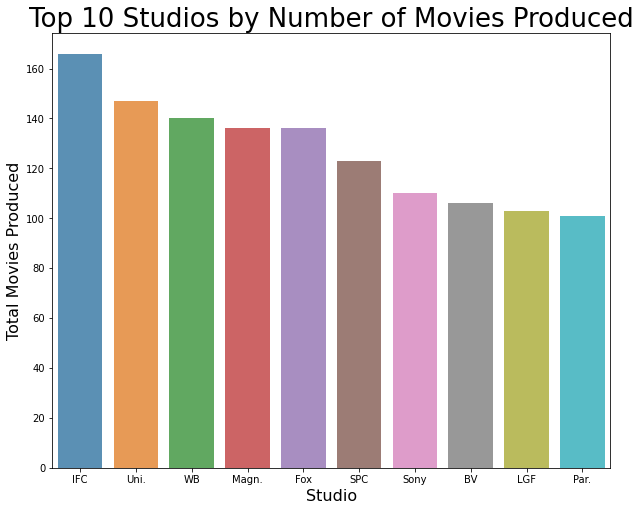

In [3]:
studio_count = studios_df['studio'].value_counts()
studio_count = studio_count[:10,]
plt.figure(figsize=(10,8))
sns.barplot(studio_count.index, studio_count.values, alpha=0.8)
plt.title('Top 10 Studios by Number of Movies Produced', fontsize=26)
plt.ylabel('Total Movies Produced', fontsize=16)
plt.xlabel('Studio', fontsize=16) 
plt.show()

All of these are American studio producers, except for SPC that is an Argentinian Company. 

In [4]:
studios_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
 5   total_gross     3382 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 185.0+ KB


In [5]:
studios_grp = studios_df.groupby(['studio'])

In [6]:
mean_gross = studios_grp['total_gross'].mean()
mean_gross.sort_values(ascending=False, inplace=True)

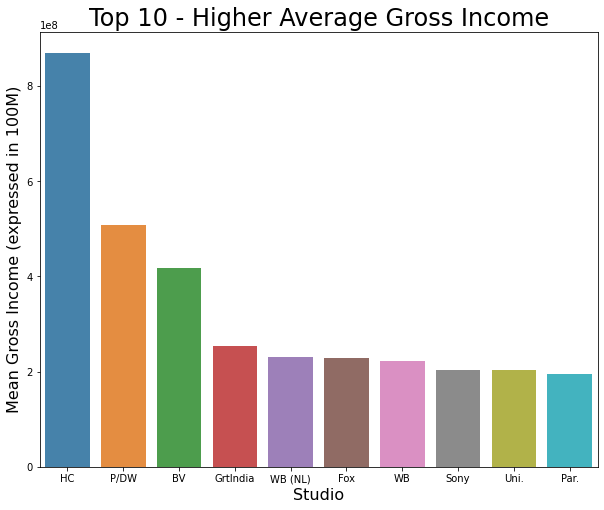

In [7]:
mean_gross = mean_gross[:10,]
plt.figure(figsize=(10,8))
sns.barplot(mean_gross.index, mean_gross.values, alpha=0.9)
plt.title('Top 10 - Higher Average Gross Income', fontsize=24)
plt.ylabel('Mean Gross Income (expressed in 100M)', fontsize=16)
plt.xlabel('Studio', fontsize=16) 
plt.show()

Up next, I will attempt to find which movies drove these studios to the Top 10. 

In [8]:
studios_df.loc[studios_df['studio'].isin(['HC', 'P/DW','GrtIndia'])]

,movie,studio,domestic_gross,foreign_gross,year,total_gross
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08
17,Megamind,P/DW,148400000.0,173500000.0,2010,3.219000e+08
71,Dinner for Schmucks,P/DW,73000000.0,13800000.0,2010,8.680000e+07
329,Transformers: Dark of the Moon,P/DW,352400000.0,771400000.0,2011,1.123800e+09
333,Kung Fu Panda 2,P/DW,165200000.0,500400000.0,2011,6.656000e+08
338,Puss in Boots,P/DW,149300000.0,405700000.0,2011,5.550000e+08
734,Madagascar 3: Europe's Most Wanted,P/DW,216400000.0,530500000.0,2012,7.469000e+08
752,Rise of the Guardians,P/DW,103400000.0,203500000.0,2012,3.069000e+08
865,A Thousand Words,P/DW,18500000.0,3600000.0,2012,2.210000e+07


Surprise, Surprise! HC studio made it to the Top 1 with just one movie (Wolf Warrior 2) of chinese origin. The Top 2 studio, Paramount/DreamWorks made mostly animated movies. The Top 4 GRT India from India, also made it with just one movie! Notice also the difference between foreign and domestic gross. for our foreign movies.

Up next we will calculate the correlation between the number of movies produced by studio and the mean gross income to see how they relate to each other.

In [9]:
correlation = mean_gross.corr(studio_count)
correlation

-0.34479787354052405

Slightly negative correlation indicates that a higher number of movies produced, does not imply higher revenue.

### Inferences:

   * Making more movies does not mean making more money.
   * Movie industry is mostly centralized in the USA.
   * Interesting presence of China, India and Argentina in our Top 10's.
   * Now that we understand our competition a little better, let's look at the numbers (notebook_2).